In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
import time

In [5]:
def isGrayScale(img):
    if(len(img.shape)<3):
        return True
    else :
        return False

In [4]:
#https://stackoverflow.com/questions/6646371/detect-which-image-is-sharper
def sharpness(img): 
    if not isGrayScale(img):
        img = color.rgb2gray(img)
    array = np.array(img, dtype=np.int32)
    gy, gx = np.gradient(array)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    return sharpness  

In [3]:
## contains the folder location of the images generated by the GAN 
folderloc = 'C:\\DragonBallZ\\Summer2018\\Video_Image_Processing_GANS\\sharedVBOX\\bedroom_ip'
sharp_dict = {}
## contains the fullpath name of the plot png  
targetGraphNameWithExt = 'grid_sharpness_plot.png' 

In [9]:
def numeric_chars2(x):
    y = x[5:-4]
    return(int(y))

In [17]:
import os
from os import listdir
from os.path import isfile, join
file_list = os.listdir(folderloc)
l1 = sorted(file_list, key = numeric_chars2)
print(l1)

['image2.png', 'image7.png', 'image15.png', 'image20.png', 'image24.png', 'image28.png', 'image4164.png', 'image4171.png', 'image4976.png']


In [41]:
print("start iterating over input images -----------------")
t_ini = time.time()
size = 0
lst = []
sharpnessFull = []
nameList = []
for ip in l1:
    nameList.append(ip)
    sharpnessList = []
    ippath = os.path.join(folderloc,ip)
    img = Image.open(ippath).convert('LA')
    # to reduce the code running multiple times. 
    #this will ensure it will get initialized just once
    if size == 0 and len(lst)==0:
        size = img.size[0]
        lst = [(size*i)/8 for i in range(0,8)]
    #iterate over the image grid 
    for col in lst:
        for row in lst:
            area = (row,col,row+(size/8),col+(size/8))
            cropped_image = img.crop(area)
            val = sharpness(np.array(cropped_image.convert('L')))
            sharpnessList.append(val)
    sharpnessFull.append(sum(sharpnessList)/len(sharpnessList))
print(sharpnessFull)

print("end iterating over input images -----------------")
t_fin = time.time()
t_diff = t_fin-t_ini
print("Total time taken = ",t_diff)


start iterating over input images -----------------
[16.22577386793407, 20.315987682450032, 22.4818954455216, 21.9690398643902, 19.22455017616911, 22.735630874534728, 18.984688894189098, 17.210839716018757, 17.127164889769325]
end iterating over input images -----------------
Total time taken =  0.4799642562866211


In [42]:
nameList

['image2.png',
 'image7.png',
 'image15.png',
 'image20.png',
 'image24.png',
 'image28.png',
 'image4164.png',
 'image4171.png',
 'image4976.png']

In [43]:
sharpnessFull

[16.22577386793407,
 20.315987682450032,
 22.4818954455216,
 21.9690398643902,
 19.22455017616911,
 22.735630874534728,
 18.984688894189098,
 17.210839716018757,
 17.127164889769325]

In [60]:
# function to normalize any list and return a list
def normalizeList(lst):
    normlst = []
    minlst = min(lst)
    maxlst = max(lst)
    for i in lst:
        normlst.append((i-minlst)/(maxlst-minlst))
    return normlst    

In [61]:
sharpness_norm = normalizeList(sharpnessFull)

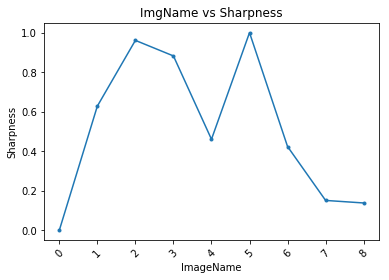

In [62]:
plt.title("ImgName vs Sharpness")
plt.xlabel('ImageName')
plt.ylabel('Sharpness')
plt.xticks(rotation=45)
plt.plot(sharpness_norm,'.-')
plt.show()